    longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
0 -120.589617  32.835749                  24          884            1831   
1 -114.804828  38.528622                  11         8196            1910   
2 -117.000781  35.498090                  49         7660            1173   
3 -118.339469  37.325650                   8         7443             851   
4 -122.783573  41.080201                  36         7306            1253   

   population  households  median_income  median_house_value  
0        5744         734       6.198347       275246.463304  
1        3014         721      12.522881       463160.253167  
2        5068         222       8.751681       129516.518562  
3        6017        1902       1.420922       383578.373335  
4        8887         864       1.033917       272663.890677  


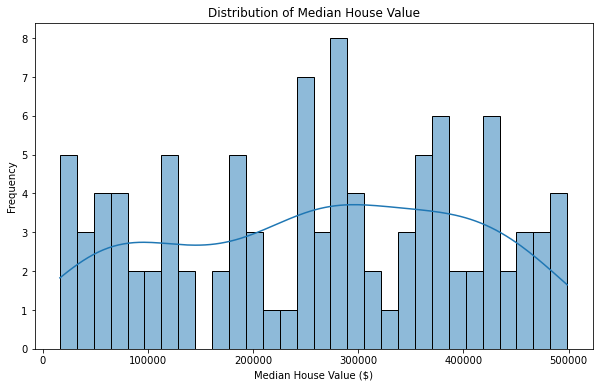

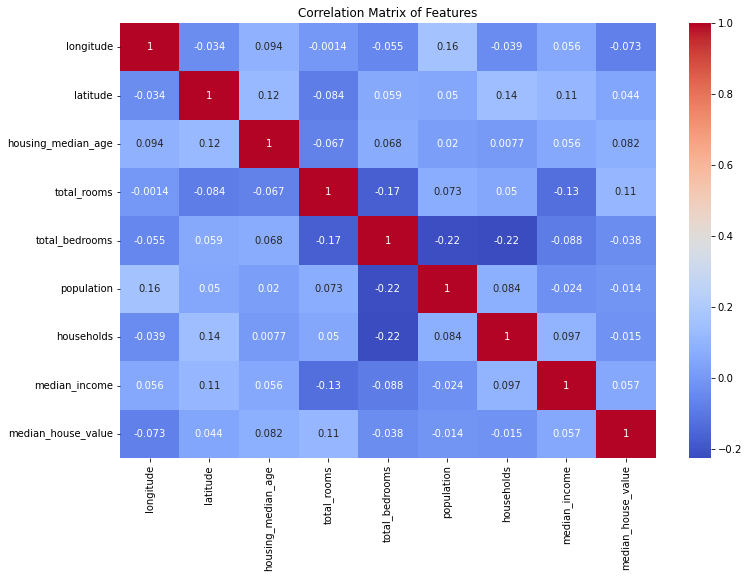

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('california_housing_prices_simulated.csv')

# Basic data exploration (showing the first few rows)
print(df.head())

# Visualizing the distribution of median_house_value again
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix visualization again
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [7]:
# Prepare the data for modeling
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
linear_r2 = r2_score(y_test, y_pred_linear)

(linear_mae, linear_rmse, linear_r2)

(93849.1128202276, 126976.07471258851, -0.523572477743488)

In [8]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

(rf_mae, rf_rmse, rf_r2)

(100919.72748187276, 130748.12692395969, -0.6154379310899469)

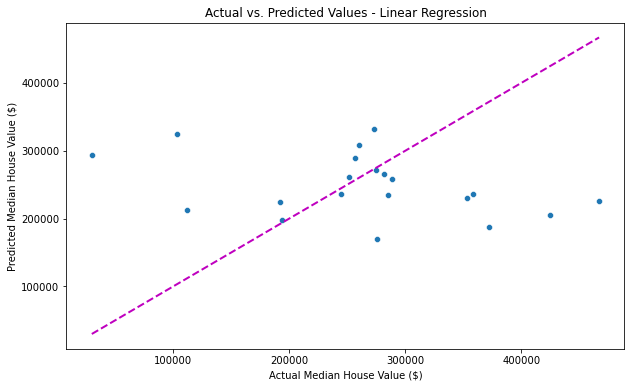

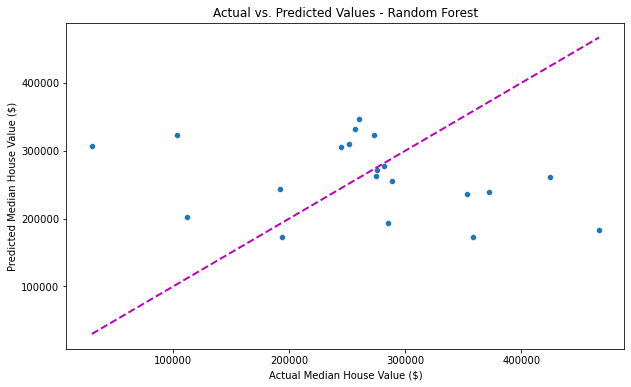

In [9]:
# Visualization for Linear Regression Model Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted Values - Linear Regression')
plt.xlabel('Actual Median House Value ($)')
plt.ylabel('Predicted Median House Value ($)')
plt.show()

# Visualization for Random Forest Model Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted Values - Random Forest')
plt.xlabel('Actual Median House Value ($)')
plt.ylabel('Predicted Median House Value ($)')
plt.show()
